### Importing Libraries

In [ ]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import torchvision.models as models
%matplotlib inline

In [ ]:
#Importing the libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import GlobalAveragePooling2D, Input, Flatten
from keras import optimizers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
import keras


### Loading the data

In [ ]:
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar100.tgz"
download_url(dataset_url, '.')

Using downloaded and verified file: ./cifar100.tgz


In [ ]:
# Extract from archive
with tarfile.open('./cifar100.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

In [ ]:
data_dir = './data/cifar100'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['train', 'test']
['large_man-made_outdoor_things', 'aquatic_mammals', 'large_carnivores', 'vehicles_1', 'fruit_and_vegetables', 'household_electrical_devices', 'vehicles_2', 'small_mammals', 'insects', 'fish', 'large_natural_outdoor_scenes', 'reptiles', 'people', 'flowers', 'medium_mammals', 'food_containers', 'non-insect_invertebrates', 'trees', 'large_omnivores_and_herbivores', 'household_furniture']


### Data Exploration

In [ ]:
x=len(os.listdir('./data/cifar100/train'))
print(f"No. of classes: {x}")
y=len(os.listdir('./data/cifar100/train/aquatic_mammals'))
print(f"No. of sub classes in each class: {y}")
z=len(os.listdir('./data/cifar100/train/aquatic_mammals/beaver'))
print(f"Total objects inside a subclass: {z}")

print(f"TRAINING SET CONTAINS {x*y*z} IMAGES")

No. of classes: 20
No. of sub classes in each class: 5
Total objects inside a subclass: 500
TRAINING SET CONTAINS 50000 IMAGES


In [ ]:
x=len(os.listdir('./data/cifar100/test'))
print(f"No. of classes: {x}")
y=len(os.listdir('./data/cifar100/test/aquatic_mammals'))
print(f"No. of sub classes in each class: {y}")
z=len(os.listdir('./data/cifar100/test/aquatic_mammals/beaver'))
print(f"Total objects inside a subclass: {z}")

print(f"TESTING SET CONTAINS {x*y*z} IMAGES")

No. of classes: 20
No. of sub classes in each class: 5
Total objects inside a subclass: 100
TESTING SET CONTAINS 10000 IMAGES


In [ ]:
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())


In [ ]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0)) #channel are at the last in matplotlib where it was at front in tensors


Label:  aquatic_mammals (0)


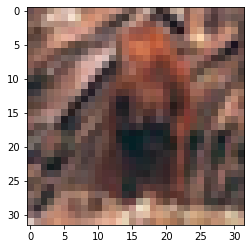

In [ ]:
#Displaying sample images
show_example(*dataset[99]) #args use 

In [ ]:
# Data transforms (normalization & data augmentation)
stats = ((0.507, 0.487, 0.441), (0.267, 0.256, 0.276))
train_tfms = tt.Compose([tt.RandomCrop(32, padding=4, padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])

### Data Pre Processing

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
y_train = tf.keras.utils.to_categorical(y_train, num_classes=100)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=100)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
class_names=['0: apple',
'1: aquarium_fish',
'2: baby',
'3: bear',
'4: beaver',
'5: bed',
'6: bee',
'7: beetle',
'8: bicycle',
'9: bottle',
'10: bowl',
'11: boy',
'12: bridge',
'13: bus',
'14: butterfly',
'15: camel',
'16: can',
'17: castle',
'18: caterpillar',
'19: cattle',
'20: chair',
'21: chimpanzee',
'22: clock',
'23: cloud',
'24: cockroach',
'25: couch',
'26: cra',
'27: crocodile',
'28: cup',
'29: dinosaur',
'30: dolphin',
'31: elephant',
'32: flatfish',
'33: forest',
'34: fox',
'35: girl',
'36: hamster',
'37: house',
'38: kangaroo',
'39: keyboard',
'40: lamp',
'41: lawn_mower',
'42: leopard',
'43: lion',
'44: lizard',
'45: lobster',
'46: man',
'47: maple_tree',
'48: motorcycle',
'49: mountain',
'50: mouse',
'51: mushroom',
'52: oak_tree',
'53: orange',
'54: orchid',
'55: otter',
'56: palm_tree',
'57: pear',
'58: pickup_truck',
'59: pine_tree',
'60: plain',
'61: plate',
'62: poppy',
'63: porcupine',
'64: possum',
'65: rabbit',
'66: raccoon',
'67: ray',
'68: road',
'69: rocket',
'70: rose',
'71: sea',
'72: seal',
'73: shark',
'74: shrew',
'75: skunk',
'76: skyscraper',
'77: snail',
'78: snake',
'79: spider',
'80: squirrel',
'81: streetcar',
'82: sunflower',
'83: sweet_pepper',
'84: table',
'85: tank',
'86: telephone',
'87: television',
'88: tiger',
'89: tractor',
'90: train',
'91: trout',
'92: tulip',
'93: turtle',
'94: wardrobe',
'95: whale',
'96: willow_tree',
'97: wolf',
'98: woman',
'99: worm']

(50000, 32, 32, 3)
(50000, 100)
(10000, 32, 32, 3)
(10000, 100)


In [ ]:
AUTO = tf.data.AUTOTUNE
BATCH_SIZE = 32
IMG_SIZE = 32

def preprocess_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.image.convert_image_dtype(image, tf.float32) / 255.0
    return image, label

In [ ]:
train_ds_one = (
    tf.data.Dataset.from_tensor_slices((x_train, y_train))
    .shuffle(1024)
    .map(preprocess_image, num_parallel_calls=AUTO)
)
train_ds_two = (
    tf.data.Dataset.from_tensor_slices((x_train, y_train))
    .shuffle(1024)
    .map(preprocess_image, num_parallel_calls=AUTO)
)

train_ds_simple = tf.data.Dataset.from_tensor_slices((x_train, y_train))

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))

train_ds_simple = (
    train_ds_simple.map(preprocess_image, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

# Combine two shuffled datasets from the same training data.
train_ds = tf.data.Dataset.zip((train_ds_one, train_ds_two))

test_ds = (
    test_ds.map(preprocess_image, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

In [ ]:
def sample_beta_distribution(size, concentration_0=0.2, concentration_1=0.2):
    gamma_1_sample = tf.random.gamma(shape=[size], alpha=concentration_1)
    gamma_2_sample = tf.random.gamma(shape=[size], alpha=concentration_0)
    return gamma_1_sample / (gamma_1_sample + gamma_2_sample)


@tf.function
def get_box(lambda_value):
    cut_rat = tf.math.sqrt(1.0 - lambda_value)

    cut_w = IMG_SIZE * cut_rat  # rw
    cut_w = tf.cast(cut_w, tf.int32)

    cut_h = IMG_SIZE * cut_rat  # rh
    cut_h = tf.cast(cut_h, tf.int32)

    cut_x = tf.random.uniform((1,), minval=0, maxval=IMG_SIZE, dtype=tf.int32)  # rx
    cut_y = tf.random.uniform((1,), minval=0, maxval=IMG_SIZE, dtype=tf.int32)  # ry

    boundaryx1 = tf.clip_by_value(cut_x[0] - cut_w // 2, 0, IMG_SIZE)
    boundaryy1 = tf.clip_by_value(cut_y[0] - cut_h // 2, 0, IMG_SIZE)
    bbx2 = tf.clip_by_value(cut_x[0] + cut_w // 2, 0, IMG_SIZE)
    bby2 = tf.clip_by_value(cut_y[0] + cut_h // 2, 0, IMG_SIZE)

    target_h = bby2 - boundaryy1
    if target_h == 0:
        target_h += 1

    target_w = bbx2 - boundaryx1
    if target_w == 0:
        target_w += 1

    return boundaryx1, boundaryy1, target_h, target_w


@tf.function
def cutmix(train_ds_one, train_ds_two):
    (image1, label1), (image2, label2) = train_ds_one, train_ds_two

    alpha = [0.25]
    beta = [0.25]

    # Get a sample from the Beta distribution
    lambda_value = sample_beta_distribution(1, alpha, beta)

    # Define Lambda
    lambda_value = lambda_value[0][0]

    # Get the bounding box offsets, heights and widths
    boundaryx1, boundaryy1, target_h, target_w = get_box(lambda_value)

    # Get a patch from the second image (`image2`)
    crop2 = tf.image.crop_to_bounding_box(
        image2, boundaryy1, boundaryx1, target_h, target_w
    )
    # Pad the `image2` patch (`crop2`) with the same offset
    image2 = tf.image.pad_to_bounding_box(
        crop2, boundaryy1, boundaryx1, IMG_SIZE, IMG_SIZE
    )
    # Get a patch from the first image (`image1`)
    crop1 = tf.image.crop_to_bounding_box(
        image1, boundaryy1, boundaryx1, target_h, target_w
    )
    # Pad the `image1` patch (`crop1`) with the same offset
    img1 = tf.image.pad_to_bounding_box(
        crop1, boundaryy1, boundaryx1, IMG_SIZE, IMG_SIZE
    )

    # Modify the first image by subtracting the patch from `image1`
    # (before applying the `image2` patch)
    image1 = image1 - img1
    # Add the modified `image1` and `image2`  together to get the CutMix image
    image = image1 + image2

    # Adjust Lambda in accordance to the pixel ration
    lambda_value = 1 - (target_w * target_h) / (IMG_SIZE * IMG_SIZE)
    lambda_value = tf.cast(lambda_value, tf.float32)

    # Combine the labels of both images
    label = lambda_value * label1 + (1 - lambda_value) * label2
    return image, label

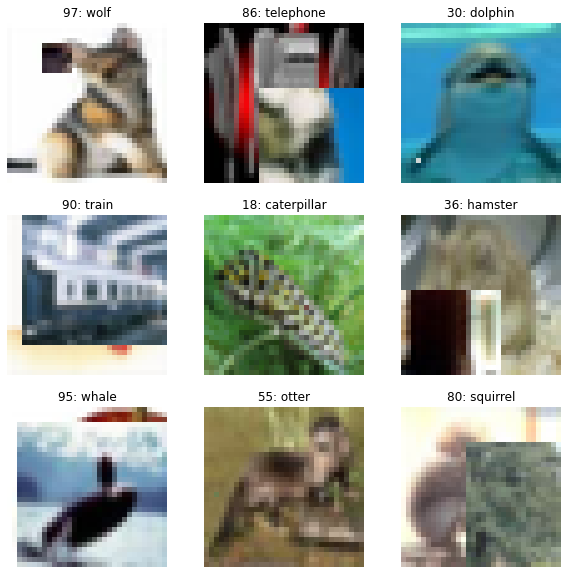

In [ ]:
# Create the new dataset using our `cutmix` utility
train_ds_cmu = (
    train_ds.shuffle(1024)
    .map(cutmix, num_parallel_calls=AUTO)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

# Let's preview 9 samples from the dataset
image_batch, label_batch = next(iter(train_ds_cmu))
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.title(class_names[np.argmax(label_batch[i])])
    plt.imshow(image_batch[i])
    plt.axis("off")


In [ ]:
def resnet_layer(
    inputs,
    num_filters=16,
    kernel_size=3,
    strides=1,
    activation="relu",
    batch_normalization=True,
    conv_first=True,
):
    conv = keras.layers.Conv2D(
        num_filters,
        kernel_size=kernel_size,
        strides=strides,
        padding="same",
        kernel_initializer="he_normal",
        kernel_regularizer=keras.regularizers.l2(1e-4),
    )
    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = keras.layers.BatchNormalization()(x)
        if activation is not None:
            x = keras.layers.Activation(activation)(x)
    else:
        if batch_normalization:
            x = keras.layers.BatchNormalization()(x)
        if activation is not None:
            x = keras.layers.Activation(activation)(x)
        x = conv(x)
    return x


def resnet_v20(input_shape, depth, num_classes=100):
    if (depth - 2) % 6 != 0:
        raise ValueError("depth should be 6n+2 (eg 20, 32, 44 in [a])")
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = keras.layers.Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # Instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x, num_filters=num_filters, strides=strides)
            y = resnet_layer(inputs=y, num_filters=num_filters, activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(
                    inputs=x,
                    num_filters=num_filters,
                    kernel_size=1,
                    strides=strides,
                    activation=None,
                    batch_normalization=False,
                )
            x = keras.layers.add([x, y])
            x = keras.layers.Activation("relu")(x)
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = keras.layers.AveragePooling2D(pool_size=8)(x)
    y = keras.layers.Flatten()(x)
    outputs = keras.layers.Dense(
        num_classes, activation="softmax", kernel_initializer="he_normal"
    )(y)

    # Instantiate model.
    model = keras.models.Model(inputs=inputs, outputs=outputs)
    return model


def training_model():
    return resnet_v20((32, 32, 3), 20)


initial_model = training_model()
initial_model.save_weights("initial_weights.h5") 

In [ ]:
model = training_model()
model.load_weights("initial_weights.h5")

model.compile(loss="categorical_crCut_mix_cifaossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(train_ds_cmu, validation_data=test_ds, epochs=15)

test_loss, test_accuracy = model.evaluate(test_ds)
print("Test accuracy: {:.2f}%".format(test_accuracy * 100))

Epoch 1/15
1563/1563 [==============================] - 817s 520ms/step - loss: 4.3072 - accuracy: 0.0842 - val_loss: 3.7667 - val_accuracy: 0.1421
Epoch 2/15
1563/1563 [==============================] - 797s 510ms/step - loss: 3.9013 - accuracy: 0.1514 - val_loss: 3.4011 - val_accuracy: 0.2010
Epoch 3/15
1563/1563 [==============================] - 805s 515ms/step - loss: 3.6765 - accuracy: 0.2014 - val_loss: 3.1777 - val_accuracy: 0.2404
Epoch 4/15
1563/1563 [==============================] - 805s 515ms/step - loss: 3.5087 - accuracy: 0.2430 - val_loss: 2.9233 - val_accuracy: 0.3030
Epoch 5/15
1563/1563 [==============================] - 804s 514ms/step - loss: 3.3902 - accuracy: 0.2769 - val_loss: 2.6977 - val_accuracy: 0.3391
Epoch 6/15
1563/1563 [==============================] - 811s 519ms/step - loss: 3.2931 - accuracy: 0.3002 - val_loss: 2.7172 - val_accuracy: 0.3492
Epoch 7/15
1563/1563 [==============================] - 801s 512ms/step - loss: 3.2297 - accuracy: 0.3204 - val_